In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import pandas as pd
import bisect

In [2]:
I_B = np.arange(0.1, 1.1, 0.1)
I_B = np.round(I_B, 2)
I_B

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

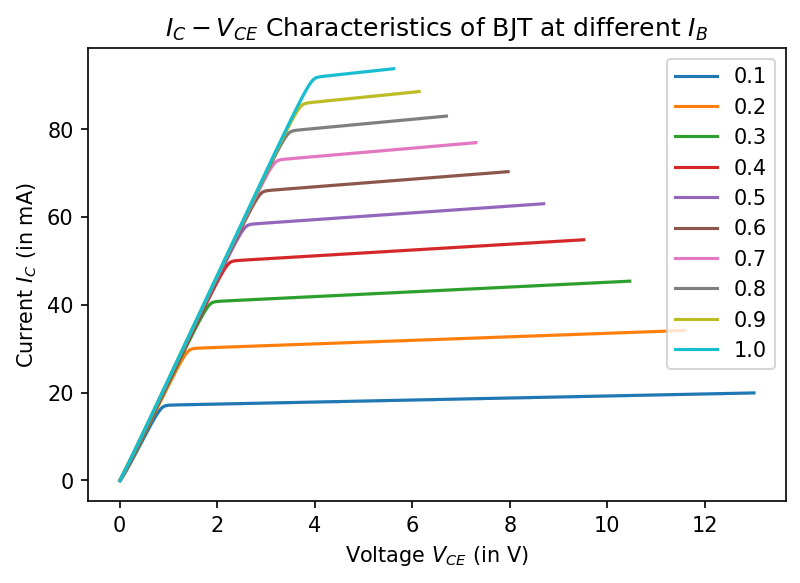

In [3]:
V_CE = []
I_C = []

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{CE}$ (in V)')
ax1.set_ylabel('Current $I_C$ (in mA)')
ax1.set_title('$I_C-V_{CE}$ Characteristics of BJT at different $I_B$')

for i in range(len(I_B)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab8\\11' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_CE.append(data[0])
    I_C.append(data[1])
    ax1.plot(V_CE[i], 1000*I_C[i], '-o', markersize=0.01)
ax1.legend(I_B)
fig1.set_dpi(150)
fig1.savefig('11a1.pdf')

In [4]:
y_intercepts = np.zeros(len(I_B))
slope_fit = np.zeros(len(I_B))
for i in range(len(I_B)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_CE[i][-2:], I_C[i][-2:])
    y_intercepts[i] = intercept
    slope_fit[i] = slope
print(slope_fit)
print(y_intercepts)

[0.00023066 0.00040292 0.00054331 0.00066431 0.000772   0.00086977
 0.00095982 0.00104362 0.00112223 0.00119645]
[0.01691834 0.0294829  0.03970028 0.04849543 0.05631273 0.06340533
 0.06993289 0.07600407 0.08169669 0.08706859]


[-73.34708123 -73.17324149 -73.07160018 -73.00099032 -72.94426165
 -72.89929053 -72.86065714 -72.82718423 -72.79830833 -72.77226071]
-72.96948758206197


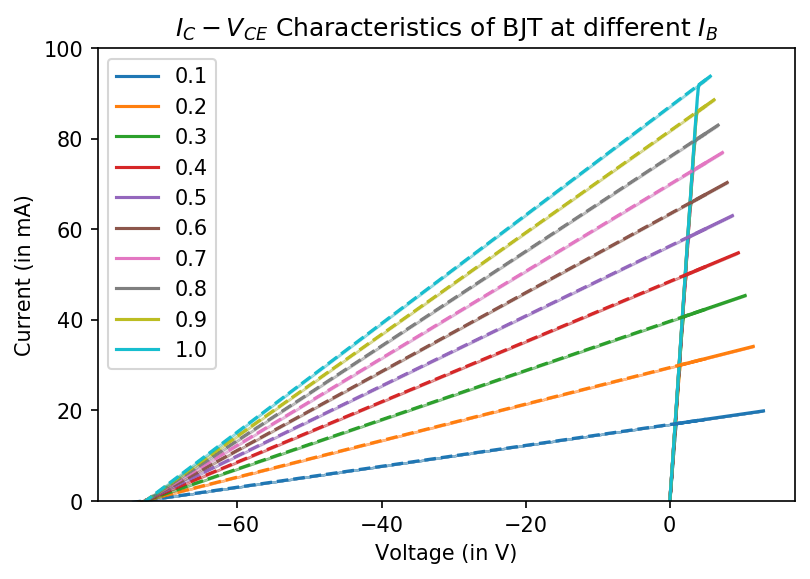

In [5]:
V_A = np.zeros(len(I_B))
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_ylim([0,100])
ax1.set_title('$I_C-V_{CE}$ Characteristics of BJT at different $I_B$')
fig1.set_dpi(150)
intersect = -75
x = np.arange(intersect,5,0.01)
for i in range(len(I_B)):
    ax1.plot(V_CE[i], 1000*I_C[i], '-o', markersize=0.01)
for i in range(len(I_B)):
    ax1.plot(x, 1000*(slope_fit[i]*x+y_intercepts[i]), '--o', markersize=0.01)
    V_A[i] = -y_intercepts[i]/slope_fit[i]
print(V_A)
print(np.mean(V_A))
ax1.legend(I_B)
fig1.savefig('11a2.pdf')

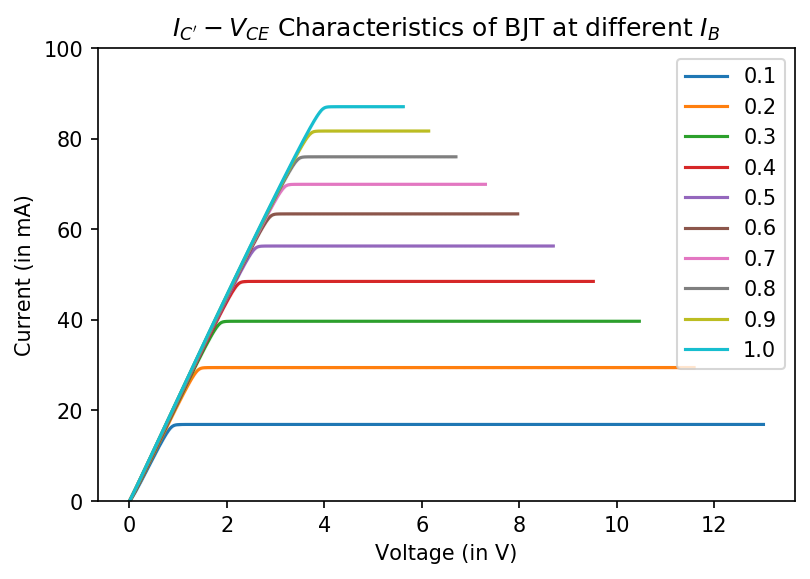

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_ylim([0,100])
ax1.set_title('$I_{C^\prime}-V_{CE}$ Characteristics of BJT at different $I_B$')
I_C1 = [I_C[i]/(1+V_CE[i]/abs(V_A[i])) for i in range(len(I_B))]
for i in range(len(I_B)):
    ax1.plot(V_CE[i], 1000*I_C1[i], '-o', markersize=0.01)
ax1.legend(I_B)
fig1.set_dpi(150)
fig1.savefig('11a3.pdf')

In [7]:
beta = np.zeros(len(I_B))
alpha = np.zeros(len(I_B))
for i in range(len(I_B)):
    beta[i] = I_C1[i][-1:]/(I_B[i]*1e-3)
    alpha[i] = beta[i]/(beta[i]+1)
print(beta)
print("beta =", np.mean(beta))
print(alpha)
print("alpha =", np.mean(alpha))

[169.18341535 147.41447768 132.3342727  121.23858225 112.6254566
 105.67554926  99.90413151  95.00509263  90.77409891  87.06858701]
beta = 116.12236639056505
[0.99412399 0.99326211 0.99250005 0.99181928 0.99119916 0.99062578
 0.9900896  0.98958389 0.98910368 0.98864521]
alpha = 0.9910952747123186


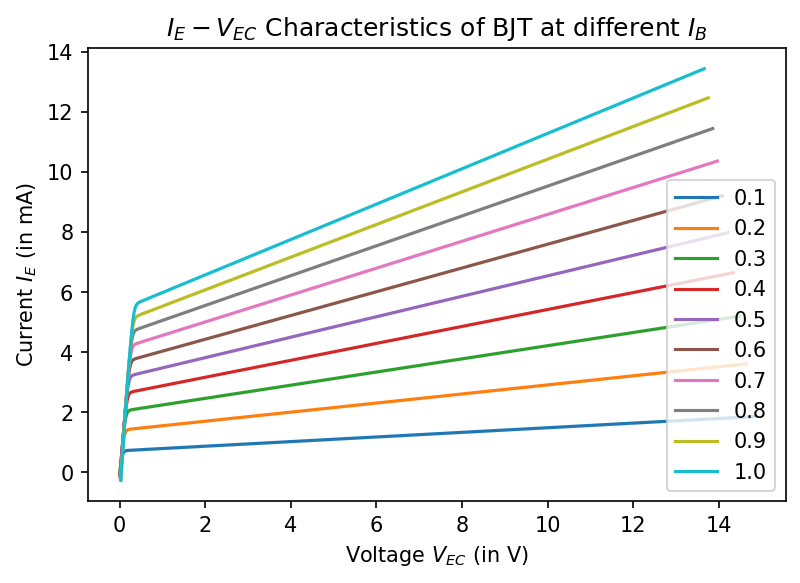

In [8]:
V_EC = []
I_E = []

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{EC}$ (in V)')
ax1.set_ylabel('Current $I_E$ (in mA)')
ax1.set_title('$I_E-V_{EC}$ Characteristics of BJT at different $I_B$')

for i in range(len(I_B)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab8\\11b' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_EC.append(data[0])
    I_E.append(data[1])
    ax1.plot(V_EC[i], 1000*I_E[i], '-o', markersize=0.01)
ax1.legend(I_B)
fig1.set_dpi(150)
fig1.savefig('11b1.pdf')

In [9]:
y_intercepts = np.zeros(len(I_B))
slope_fit = np.zeros(len(I_B))
for i in range(len(I_B)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_EC[i][-2:], I_E[i][-2:])
    y_intercepts[i] = intercept
    slope_fit[i] = slope
print(slope_fit)
print(y_intercepts)

[7.69851667e-05 1.51259771e-04 2.19329818e-04 2.82217881e-04
 3.40814849e-04 3.95828179e-04 4.47792381e-04 4.97108067e-04
 5.44143232e-04 5.89144085e-04]
[0.00071324 0.00139754 0.00202288 0.00259926 0.00313541 0.00363774
 0.00411136 0.00456044 0.00498766 0.00539587]


[-9.26457803 -9.23932226 -9.22299775 -9.21011993 -9.19973364 -9.19020864
 -9.18138891 -9.17395003 -9.16608271 -9.15882303]


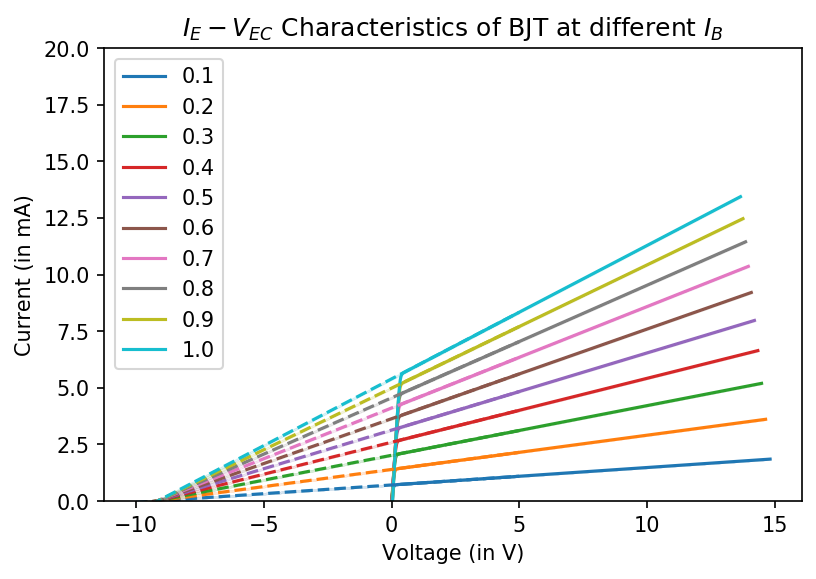

In [10]:
V_A = np.zeros(len(I_B))
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_ylim([0,20])
ax1.set_title('$I_E-V_{EC}$ Characteristics of BJT at different $I_B$')
fig1.set_dpi(150)
intersect = -10
x = np.arange(intersect,5,0.01)
for i in range(len(I_B)):
    ax1.plot(V_EC[i], 1000*I_E[i], '-o', markersize=0.01)
for i in range(len(I_B)):
    ax1.plot(x, 1000*(slope_fit[i]*x+y_intercepts[i]), '--o', markersize=0.01)
    V_A[i] = -y_intercepts[i]/slope_fit[i]
print(V_A)
ax1.legend(I_B)
fig1.savefig('11b2.pdf')

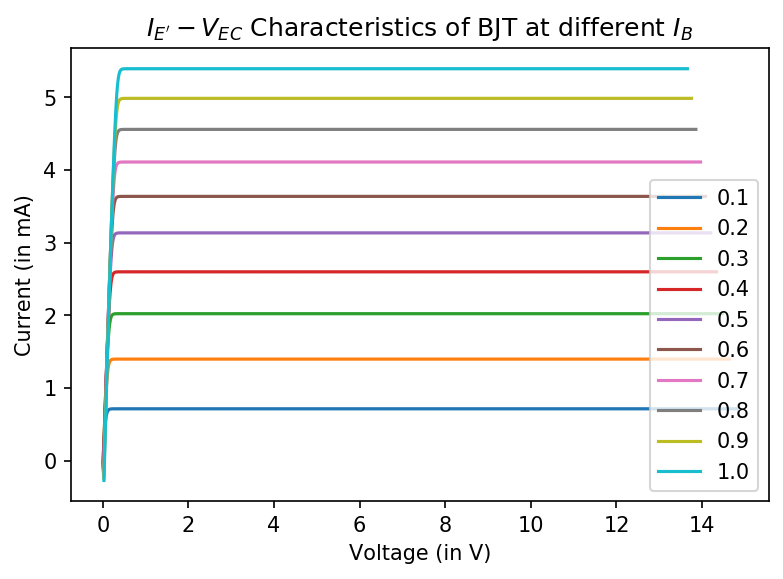

In [11]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_title('$I_{E^\prime}-V_{EC}$ Characteristics of BJT at different $I_B$')
I_E1 = [I_E[i]/(1+V_EC[i]/abs(V_A[i])) for i in range(len(I_B))]
for i in range(len(I_B)):
    ax1.plot(V_EC[i], 1000*I_E1[i], '-o', markersize=0.01)
ax1.legend(I_B)
fig1.set_dpi(150)
fig1.savefig('11b3.pdf')

In [12]:
rbeta = np.zeros(len(I_B))
for i in range(len(I_B)):
    rbeta[i] = I_E1[i][-1:]/(I_B[i]*1e-3)
print(rbeta)
print("rbeta =", np.mean(rbeta))

[7.13235084 6.98768883 6.74292806 6.49815132 6.27081166 6.06290591
 5.87336572 5.70055571 5.54184652 5.39586642]
rbeta = 6.220647099196276


In [13]:
I_B = np.arange(1, 11, 1)
I_B

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

E:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
E:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
E:\Program_Files\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


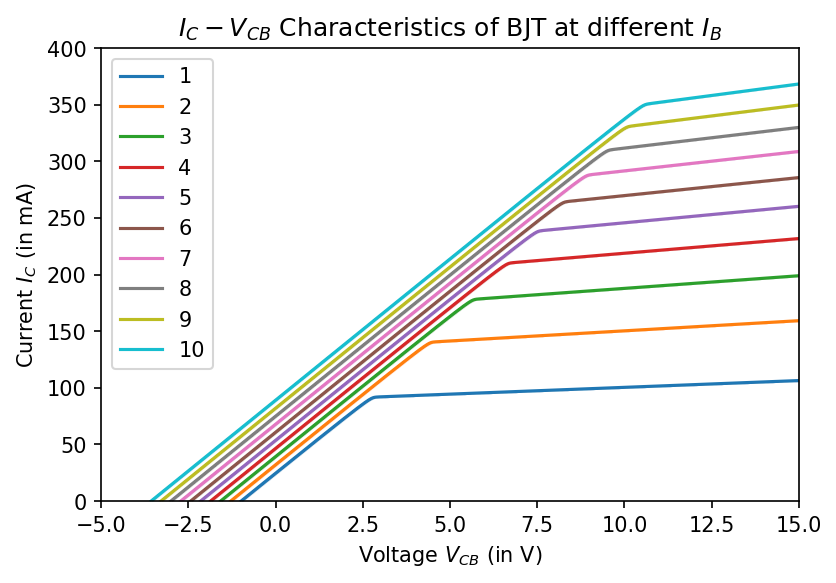

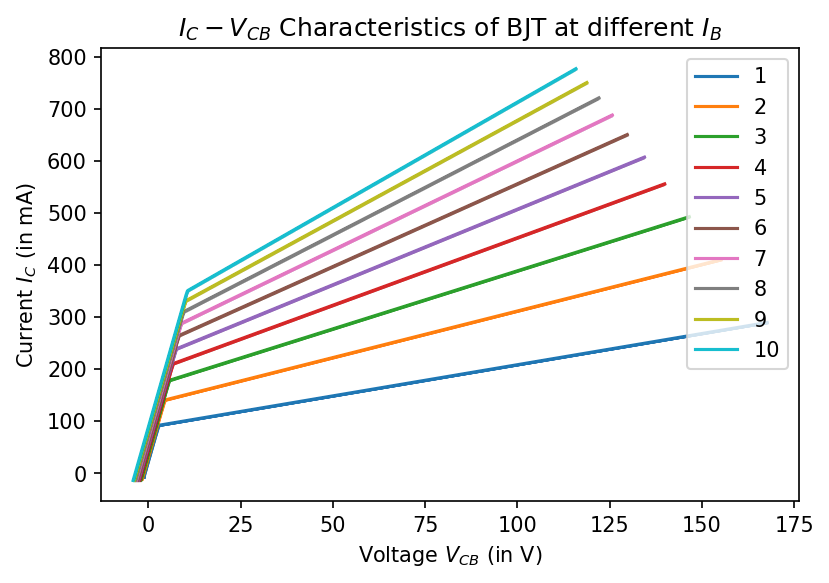

In [14]:
V_CB = []
I_C = []

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{CB}$ (in V)')
ax1.set_ylabel('Current $I_C$ (in mA)')
ax1.set_title('$I_C-V_{CB}$ Characteristics of BJT at different $I_B$')

fig2, ax2 = plt.subplots()
ax2.set_xlabel('Voltage $V_{CB}$ (in V)')
ax2.set_ylabel('Current $I_C$ (in mA)')
ax2.set_title('$I_C-V_{CB}$ Characteristics of BJT at different $I_B$')

for i in range(len(I_B)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab8\\12' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_CB.append(data[0])
    I_C.append(data[1])
    ax1.plot(V_CB[i], 1000*I_C[i], '-o', markersize=0.01)
    ax2.plot(V_CB[i], 1000*I_C[i], '-o', markersize=0.01)

ax1.set_xlim([-5,15])
ax1.set_ylim([0,400])
ax1.legend(I_B)
fig1.set_dpi(150)
fig1.savefig('12a11.pdf')
ax2.legend(I_B)
fig2.set_dpi(150)
fig2.savefig('12a12.pdf')

In [15]:
y_intercepts = np.zeros(len(I_B))
slope_fit = np.zeros(len(I_B))
for i in range(len(I_B)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_CB[i][-2:], I_C[i][-2:])
    y_intercepts[i] = intercept
    slope_fit[i] = slope
print(slope_fit)
print(y_intercepts)

[0.00119785 0.00179018 0.00223134 0.00259351 0.00290416 0.00317873
 0.00342557 0.00365138 0.00385976 0.00405256]
[0.08847677 0.13245839 0.16555095 0.19290466 0.2167269  0.2379902
 0.25739084 0.27522562 0.29183658 0.30755782]


[-73.86311932 -73.99182558 -74.19337313 -74.3796673  -74.62624638
 -74.86954393 -75.13806123 -75.37572989 -75.60996052 -75.89214086]
-74.79396681192023


E:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
E:\Program_Files\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


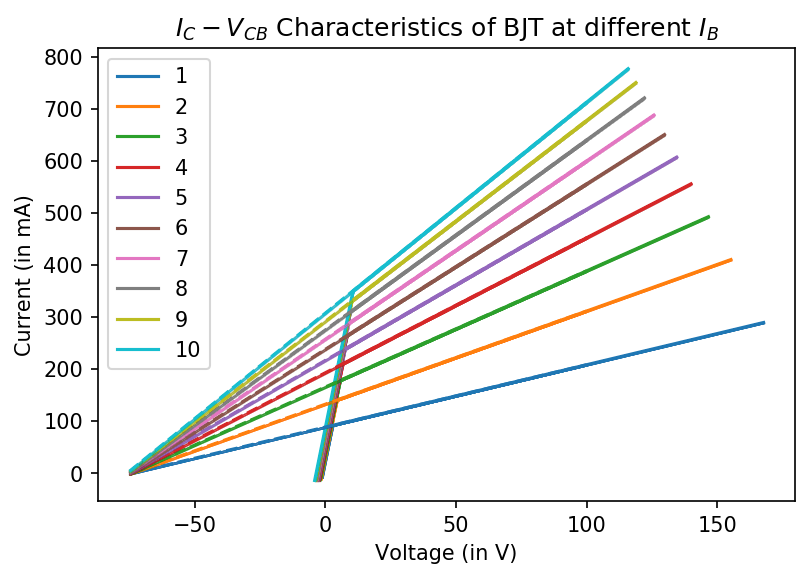

In [16]:
V_A = np.zeros(len(I_B))
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_title('$I_C-V_{CB}$ Characteristics of BJT at different $I_B$')
fig1.set_dpi(150)
intersect = -75
x = np.arange(intersect,100,0.01)
for i in range(len(I_B)):
    ax1.plot(V_CB[i], 1000*I_C[i], '-o', markersize=0.01)
for i in range(len(I_B)):
    ax1.plot(x, 1000*(slope_fit[i]*x+y_intercepts[i]), '--o', markersize=0.01)
    V_A[i] = -y_intercepts[i]/slope_fit[i]
print(V_A)
print(np.mean(V_A))
ax1.legend(I_B)
fig1.savefig('12a2.pdf')

E:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.
E:\Program_Files\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


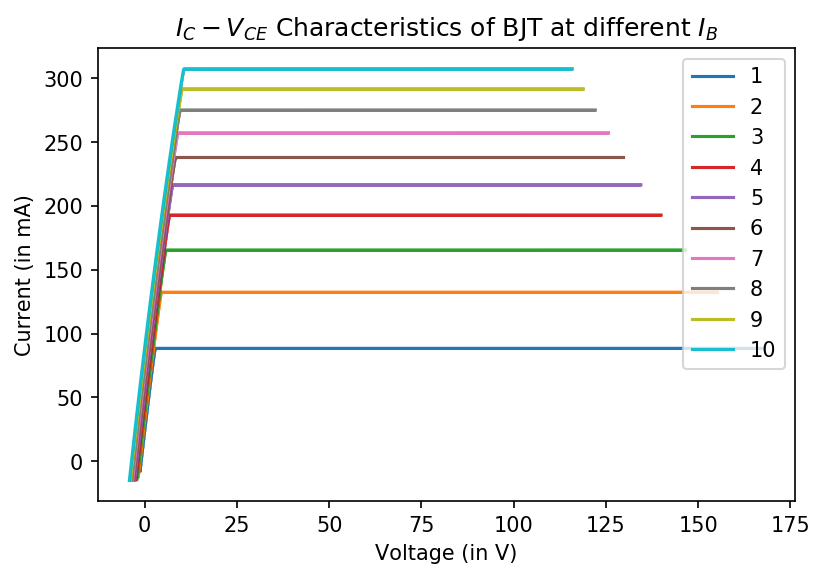

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_title('$I_{C^\prime}-V_{CB}$ Characteristics of BJT at different $I_B$')
I_C1 = [I_C[i]/(1+V_CB[i]/abs(V_A[i])) for i in range(len(I_B))]
for i in range(len(I_B)):
    ax1.plot(V_CB[i], 1000*I_C1[i], '-o', markersize=0.01)
ax1.legend(I_B)
fig1.set_dpi(150)
fig1.savefig('12a3.pdf')

In [18]:
beta = np.zeros(len(I_B))
alpha = np.zeros(len(I_B))
for i in range(len(I_B)):
    beta[i] = I_C1[i][-1:]/(I_B[i]*1e-3)
    alpha[i] = beta[i]/(beta[i]+1)
print(beta)
print("beta =", np.mean(beta))
print(alpha)
print("alpha =", np.mean(alpha))

[88.47677312 66.2291928  55.18365089 48.22616553 43.34537927 39.66503381
 36.77011987 34.40320193 32.42628698 30.75578206]
beta = 47.54815862429751
[0.98882392 0.98512551 0.98220123 0.9796856  0.97744974 0.97540885
 0.97352404 0.97175397 0.97008343 0.96850967]
alpha = 0.9772565947228588


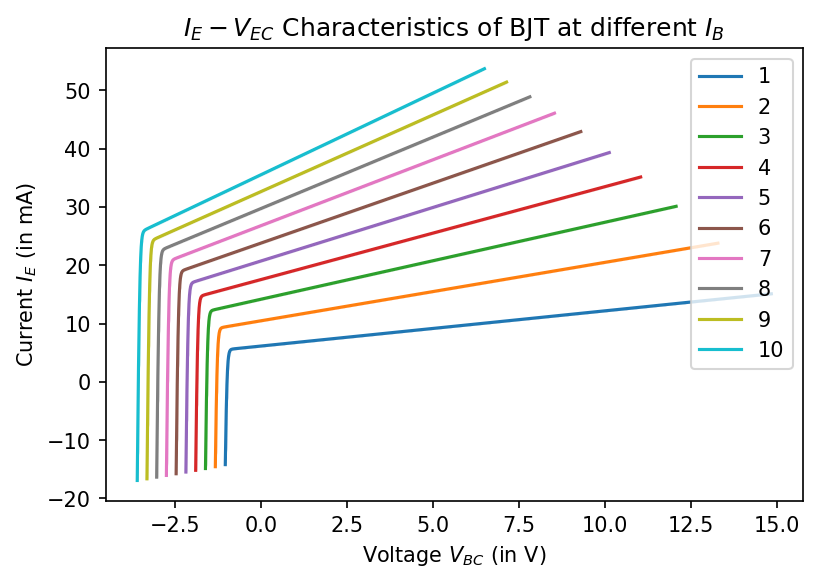

In [19]:
V_BC = []
I_E = []

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{BC}$ (in V)')
ax1.set_ylabel('Current $I_E$ (in mA)')
ax1.set_title('$I_E-V_{EC}$ Characteristics of BJT at different $I_B$')

for i in range(len(I_B)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab8\\12b' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_BC.append(data[0])
    I_E.append(data[1])
    ax1.plot(V_BC[i], 1000*I_E[i], '-o', markersize=0.01)
ax1.legend(I_B)
fig1.set_dpi(150)
fig1.savefig('12b1.pdf')

In [20]:
y_intercepts = np.zeros(len(I_B))
slope_fit = np.zeros(len(I_B))
for i in range(len(I_B)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_BC[i][-2:], I_E[i][-2:])
    y_intercepts[i] = intercept
    slope_fit[i] = slope
print(slope_fit)
print(y_intercepts)

[0.00060337 0.00100128 0.00131939 0.00159218 0.00183472 0.00205533
 0.00225899 0.00244907 0.00262797 0.00279745]
[0.00614871 0.01048228 0.01417992 0.01755577 0.02074327 0.02381114
 0.02680177 0.02974173 0.03264924 0.03553719]


[-10.19057385 -10.46890697 -10.74736673 -11.02622553 -11.30593285
 -11.58504271 -11.86450953 -12.14408274 -12.42373926 -12.70340626]


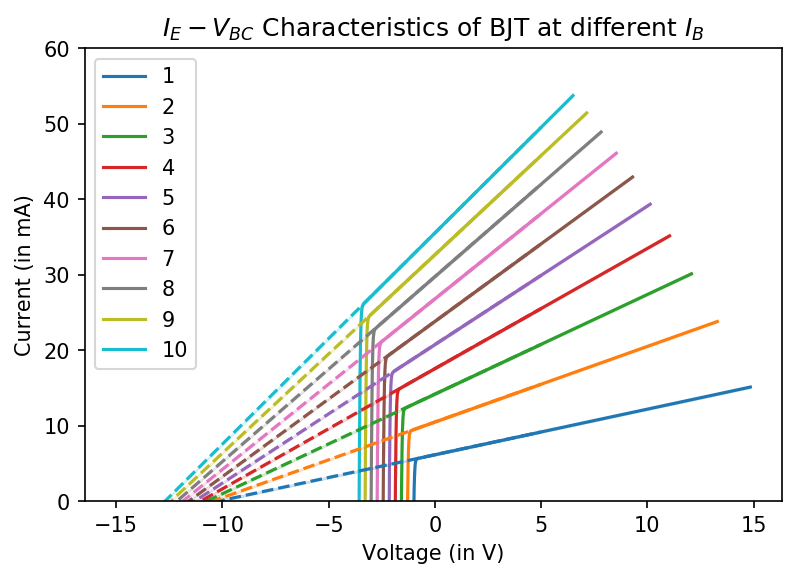

In [21]:
V_A = np.zeros(len(I_B))
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_ylim([0,60])
ax1.set_title('$I_E-V_{BC}$ Characteristics of BJT at different $I_B$')
fig1.set_dpi(150)
intersect = -15
x = np.arange(intersect,5,0.01)
for i in range(len(I_B)):
    ax1.plot(V_BC[i], 1000*I_E[i], '-o', markersize=0.01)
for i in range(len(I_B)):
    ax1.plot(x, 1000*(slope_fit[i]*x+y_intercepts[i]), '--o', markersize=0.01)
    V_A[i] = -y_intercepts[i]/slope_fit[i]
print(V_A)
ax1.legend(I_B)
fig1.savefig('12b2.pdf')

[6.14871443 5.24113785 4.72663949 4.38894261 4.14865383 3.96852298
 3.82882425 3.71771613 3.62769317 3.55371857]
rbeta = 4.335056329929236


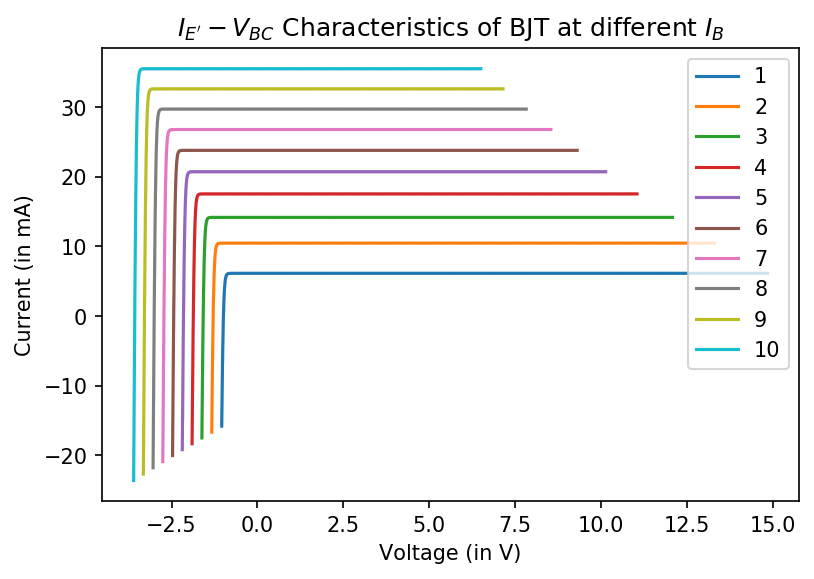

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_title('$I_{E^\prime}-V_{BC}$ Characteristics of BJT at different $I_B$')
I_E1 = [I_E[i]/(1+V_BC[i]/abs(V_A[i])) for i in range(len(I_B))]
for i in range(len(I_B)):
    ax1.plot(V_BC[i], 1000*I_E1[i], '-o', markersize=0.01)
ax1.legend(I_B)
fig1.set_dpi(150)
fig1.savefig('12b3.pdf')


rbeta = np.zeros(len(I_B))
for i in range(len(I_B)):
    rbeta[i] = I_E1[i][-1:]/(I_B[i]*1e-3)
print(rbeta)
print("rbeta =", np.mean(rbeta))

0.00010599893824067325 0.007861352526130395
-74.16444595209998


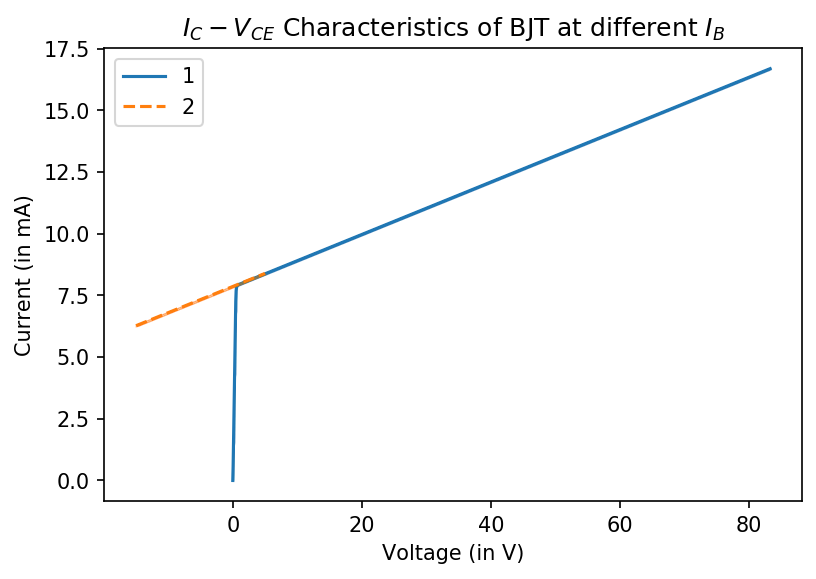

In [23]:
data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab8\\3.txt', header = None, skipinitialspace=True, delim_whitespace=True)
V_CE = data[0]
I_C = data[1]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_title('$I_C-V_{CE}$ Characteristics of BJT at different $I_B$')
ax1.plot(V_CE, 1000*I_C, '-o', markersize=0.01)
fig1.set_dpi(150)

slope, intercept, r_value, p_value, std_err = stats.linregress(V_CE[-2:], I_C[-2:])
print(slope, intercept)

ax1.plot(x, 1000*(slope*x+intercept), '--o', markersize=0.01)
V_A = -intercept/slope
print(V_A)
ax1.legend(I_B)
fig1.savefig('3.pdf')